# import 


In [41]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn import model_selection
import statsmodels.api as sm
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder
from sklearn.model_selection import cross_val_score,cross_validate
import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer
from pickle import *

In [3]:
df_clean = pd.read_csv ('dataframeclean.csv')

In [4]:
df_clean

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,bins_latitude,bins_housing_median_age,bins_total_rooms,bins_total_bedrooms,bins_population,bins_households,bins_median_income
0,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,INLAND,"(36.573, 37.917]","(0.949, 8.286]","(-33.314, 5622.286]","(-4.208, 888.857]","(-13.302, 2331.857]","(-3.356, 767.143]","(0.485, 2.571]"
1,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,<1H OCEAN,"(32.531, 33.884]","(0.949, 8.286]","(-33.314, 5622.286]","(-4.208, 888.857]","(-13.302, 2331.857]","(-3.356, 767.143]","(6.714, 8.786]"
2,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,INLAND,"(36.573, 37.917]","(22.857, 30.143]","(-33.314, 5622.286]","(-4.208, 888.857]","(-13.302, 2331.857]","(-3.356, 767.143]","(0.485, 2.571]"
3,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,<1H OCEAN,"(33.884, 35.229]","(30.143, 37.429]","(-33.314, 5622.286]","(-4.208, 888.857]","(-13.302, 2331.857]","(-3.356, 767.143]","(0.485, 2.571]"
4,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,INLAND,"(36.573, 37.917]","(15.571, 22.857]","(-33.314, 5622.286]","(-4.208, 888.857]","(-13.302, 2331.857]","(-3.356, 767.143]","(2.571, 4.643]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16505,-121.90,39.59,20.0,1465.0,278.0,745.0,250.0,3.0625,93800.0,INLAND,"(39.261, 40.606]","(15.571, 22.857]","(-33.314, 5622.286]","(-4.208, 888.857]","(-13.302, 2331.857]","(-3.356, 767.143]","(2.571, 4.643]"
16506,-122.25,38.11,49.0,2365.0,504.0,1131.0,458.0,2.6133,103100.0,NEAR BAY,"(37.917, 39.261]","(44.714, 52.0]","(-33.314, 5622.286]","(-4.208, 888.857]","(-13.302, 2331.857]","(-3.356, 767.143]","(2.571, 4.643]"
16507,-121.22,38.92,19.0,2531.0,461.0,1206.0,429.0,4.4958,192600.0,INLAND,"(37.917, 39.261]","(15.571, 22.857]","(-33.314, 5622.286]","(-4.208, 888.857]","(-13.302, 2331.857]","(-3.356, 767.143]","(2.571, 4.643]"
16508,-118.14,34.16,39.0,2776.0,840.0,2546.0,773.0,2.5750,153500.0,<1H OCEAN,"(33.884, 35.229]","(37.429, 44.714]","(-33.314, 5622.286]","(-4.208, 888.857]","(2331.857, 4660.714]","(767.143, 1532.286]","(2.571, 4.643]"


# Baseline model 

In [72]:
features = [
 'longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

In [73]:
# Choose your feature and your target
X = df_clean[features]
y = df_clean['median_house_value']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=3)

# Choose your model
model = LinearRegression()

# Fit the model with the train set
model.fit(X_train, y_train)

# Evaluate the model with the test set
baseline_score = model.score(X_test, y_test)
baseline_score

0.639149507560891

## Cross Validation

In [74]:
scores=model_selection.cross_val_score(model,X ,y ,  cv=5)
print("score",scores)
print("moyenne :%0.03f , deviation: :%0.03f" % (scores.mean(), scores.std()))

score [0.65030626 0.6289704  0.6529271  0.63781955 0.62927456]
moyenne :0.640 , deviation: :0.010


# Itération 2 OneHot


In [75]:
feature_cols = [
 'longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'ocean_proximity']


X = df_clean[feature_cols]
y = df_clean['median_house_value']

In [76]:
column_trans = make_column_transformer((OneHotEncoder(), ['ocean_proximity']),
                                       
                                      remainder='passthrough')

In [77]:
linreg = LinearRegression()

In [78]:
pipe = make_pipeline(column_trans, linreg)

In [79]:
pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['ocean_proximity'])])),
                ('linearregression', LinearRegression())])

In [80]:
socre_r2 = cross_val_score(pipe, X, y, cv=10,scoring="r2").mean()

In [81]:
socre_mean_abso_error = cross_val_score(pipe, X, y, cv=10,scoring="neg_mean_absolute_error").mean().round(2)

In [82]:
socre_r2

0.6495276303500112

In [83]:
socre_mean_abso_error

-49698.1

In [84]:
pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['ocean_proximity'])])),
                ('linearregression', LinearRegression())])

# Iteration 3 Feature permutation 



In [85]:
from sklearn.inspection import permutation_importance

In [86]:
scores=model_selection.cross_val_score(pipe,X ,y ,  cv=5)
print("score",scores)
print("moyenne :%0.03f , deviation: :%0.03f" % (scores.mean(), scores.std()))

score [0.66043355 0.63805791 0.66135558 0.65094632 0.63679063]
moyenne :0.650 , deviation: :0.011


In [87]:
pipe.fit(X,y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['ocean_proximity'])])),
                ('linearregression', LinearRegression())])

In [88]:
result = permutation_importance(pipe, X, y, n_repeats=10,random_state=0)

In [89]:
result.importances_mean

array([0.41795776, 0.44099072, 0.02512449, 0.01089166, 0.10324109,
       0.38912484, 0.21192403, 0.79583747, 0.05325328])

In [90]:
pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['ocean_proximity'])])),
                ('linearregression', LinearRegression())])

In [91]:
sorted_idx = result.importances_mean.argsort()

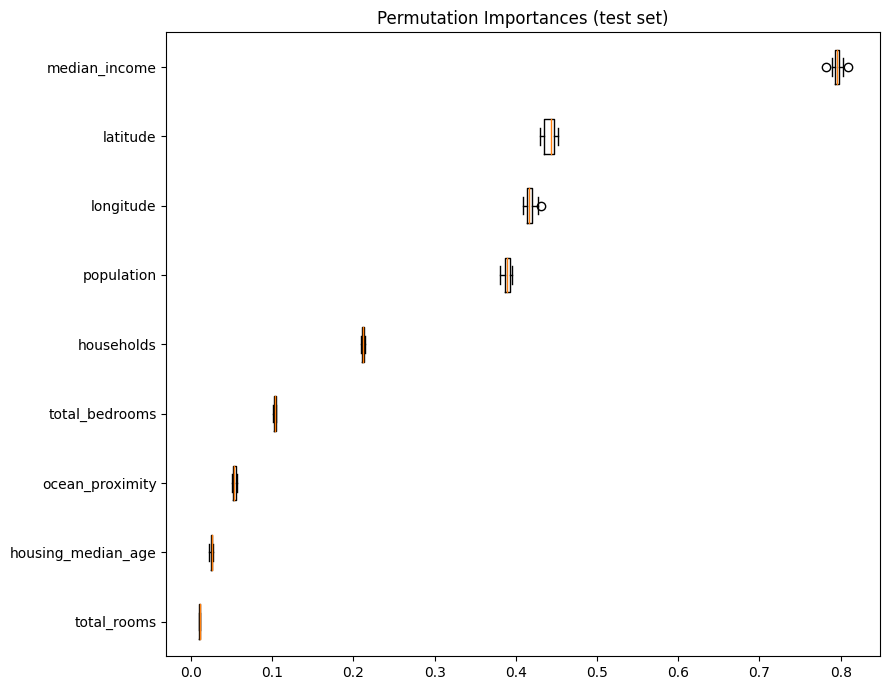

In [95]:
#We see that some feature avec low importance 
fig, ax = plt.subplots(figsize=(9,7))
ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=X.columns[sorted_idx])
ax.set_title("Permutation Importances (test set)")
fig.tight_layout()
plt.show()

In [96]:
scores = cross_validate(pipe, X, y, cv=5, scoring=('r2', 'neg_root_mean_squared_error','neg_mean_absolute_error'))

average_r2 = scores['test_r2'].mean()
average_rmse = -scores['test_neg_root_mean_squared_error'].mean()
average_mae = -scores['test_neg_mean_absolute_error'].mean()
print("Average R2: ", average_r2, "// Average RMSE: ", average_rmse, "// Average MAE:", average_mae)

Average R2:  0.6495167994002019 // Average RMSE:  68192.0045484655 // Average MAE: 49704.14952807123


# Iteration 3 Feature permutation 


In [97]:
pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['ocean_proximity'])])),
                ('linearregression', LinearRegression())])

In [98]:
#We try remove the least important feature but not better
feature_cols = [
 'longitude',
 'latitude',
  'housing_median_age',
#   'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'ocean_proximity']


X = df_clean[feature_cols]
y = df_clean['median_house_value']

In [99]:
scores = cross_validate(pipe, X, y, cv=5, scoring=('r2', 'neg_root_mean_squared_error','neg_mean_absolute_error'))

average_r2 = scores['test_r2'].mean()
average_rmse = -scores['test_neg_root_mean_squared_error'].mean()
average_mae = -scores['test_neg_mean_absolute_error'].mean()
print("Average R2: ", average_r2, "// Average RMSE: ", average_rmse, "// Average MAE:", average_mae)

Average R2:  0.6491310455614656 // Average RMSE:  68229.98203753296 // Average MAE: 49812.363977130226


In [100]:
#We try remove the 2nd least important feature but not better
feature_cols = [
 'longitude',
 'latitude',
#   'housing_median_age',
  'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'ocean_proximity']


X = df_clean[feature_cols]
y = df_clean['median_house_value']

In [101]:
scores = cross_validate(pipe, X, y, cv=5, scoring=('r2', 'neg_root_mean_squared_error','neg_mean_absolute_error'))

average_r2 = scores['test_r2'].mean()
average_rmse = -scores['test_neg_root_mean_squared_error'].mean()
average_mae = -scores['test_neg_mean_absolute_error'].mean()
print("Average R2: ", average_r2, "// Average RMSE: ", average_rmse, "// Average MAE:", average_mae)

Average R2:  0.6401983338218342 // Average RMSE:  69094.77999487538 // Average MAE: 50213.070367754946


# Iteration 3 MinMax  


In [102]:
from sklearn.preprocessing import MinMaxScaler

In [103]:
df_minx_max = df_clean.copy()

In [104]:
min_max_col = [
 'longitude',
 'latitude',
'housing_median_age',
  'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']


In [105]:
df_minx_max[min_max_col] = MinMaxScaler().fit_transform(np.array(df_minx_max[min_max_col]))

In [106]:
feature_cols = [
 'longitude',
 'latitude',
 'housing_median_age',
  'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'ocean_proximity']

In [107]:

X = df_minx_max[feature_cols]
y = df_clean['median_house_value']

In [108]:
#it's not better 
scores = cross_validate(pipe, X, y, cv=5, scoring=('r2', 'neg_root_mean_squared_error','neg_mean_absolute_error'))

average_r2 = scores['test_r2'].mean()
average_rmse = -scores['test_neg_root_mean_squared_error'].mean()
average_mae = -scores['test_neg_mean_absolute_error'].mean()
print("Average R2: ", average_r2, "// Average RMSE: ", average_rmse, "// Average MAE:", average_mae)

Average R2:  0.6494682364540078 // Average RMSE:  68196.6689864473 // Average MAE: 49714.90321017565


In [109]:
fichier_pickle = open ("fichier_pickle","wb")

In [110]:
x = 3 

In [111]:
dump(pipe,fichier_pickle)

In [112]:
dump(x,fichier_pickle)

In [113]:
fichier_pickle.close()